# 당뇨병 데이터 딥러닝 회귀

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
# 데이터 로딩
file_path = "D:/AI_data/diabetes.csv"
df = pd.read_csv(file_path)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# 'Outcome' 컬럼 제거
df = df.drop('Outcome', axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
# 레이블 확인
df['BMI'].value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64

In [8]:
# 데이터 분할
X = df.drop(columns=['BMI'])
y = df['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 원-핫 엔코딩
Y = pd.get_dummies(y).values

In [10]:
# 넘파이 변환
X = X.values

In [23]:
y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 7), (614, 248), (154, 7), (154, 248))

In [15]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(7,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

C:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,295 (5.06 KB)

 Trainable params: 1,295 (5.06 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 234.2823 - mse: 234.2823 - val_loss: 8.4862 - val_mse: 8.4862
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.4753 - mse: 7.4753 - val_loss: 2.6881 - val_mse: 2.6881
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.1097 - mse: 3.1097 - val_loss: 0.9038 - val_mse: 0.9038
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1890 - mse: 2.1890 - val_loss: 14.9481 - val_mse: 14.9481
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2273 - mse: 5.2273 - val_loss: 0.5572 - val_mse: 0.5572
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.3891 - mse: 2.3891 - val_loss: 0.5655 - val_mse: 0.5655
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.9002 - mse: 1.9002 - val_loss: 3.3579 - val_mse: 3.3579
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.1805 - mse: 3.1805 - val_loss: 0.5334 - val_mse: 0.5334
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss:

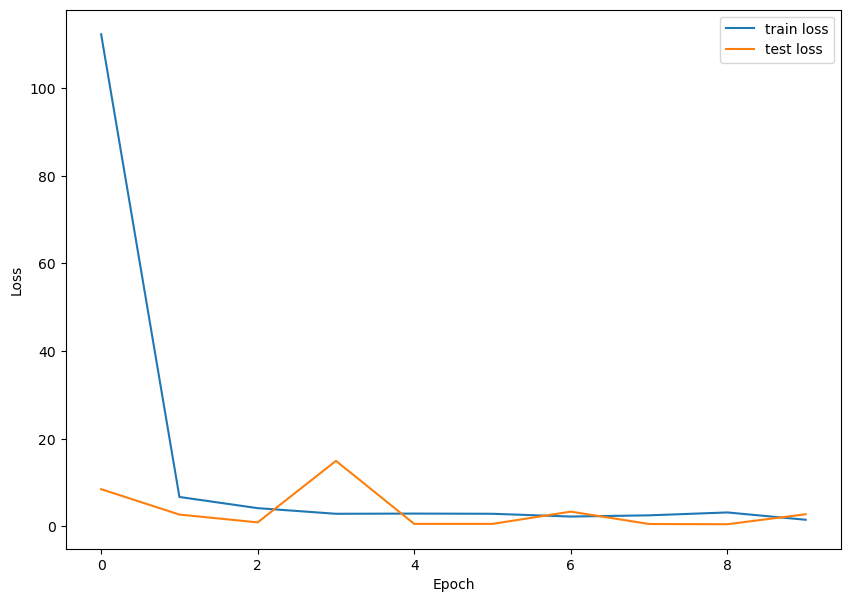

In [17]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.8827 - mse: 2.8827


[2.7616336345672607, 2.7616336345672607]